## Time Series Forecasting : ARIMA vs Prophet

In [22]:
#Importing required Libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset
df = pd.read_csv('C:\\Users\\KRISH\\Downloads\\monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly_Prod
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly_Prod
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


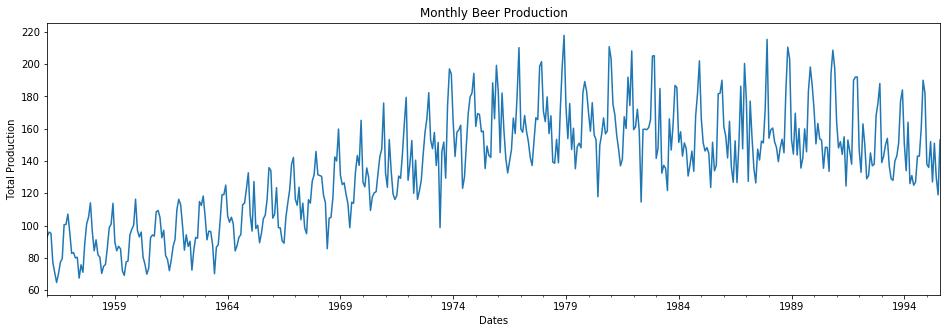

In [4]:
#Basic Data Plot
df.index.freq = 'MS'
ax = df['Monthly_Prod'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

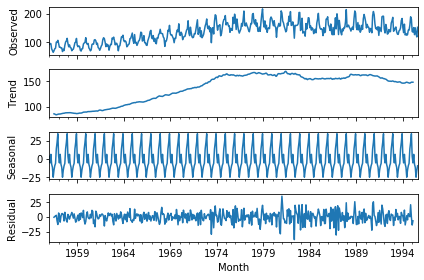

In [5]:
#Seasonal Decompose Plots
a = seasonal_decompose(df["Monthly_Prod"], model = "add")
a.plot();

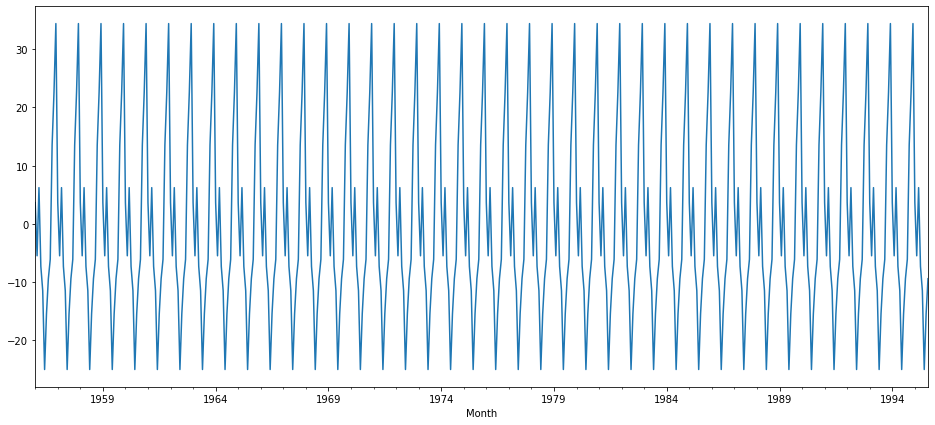

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [7]:
#ARIMA Forecast
#Finding the best values for p,q,d,P,Q,D

auto_arima(df['Monthly_Prod'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  476
Model:             SARIMAX(3, 1, 4)x(1, 0, 2, 12)   Log Likelihood               -1729.705
Date:                            Tue, 14 Jan 2020   AIC                           3483.410
Time:                                    18:20:51   BIC                           3533.370
Sample:                                         0   HQIC                          3503.057
                                            - 476                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.006      0.072      0.942      -0.011       0.012
ar.L1         -0.3673      0.057     -6.411      0.000      -0.480      -0.255
ar.L2         -0.0964      0.066     -1.456      0.145      -0.226       0.033
ar.L3          0.7744      0.058     13.420      0.000       0.661       0.888
ma.L1         -0.7014      0.041    -17.285      0.000      -0.781      -0.622
ma.L2         -0.1838      0.018    -10.072      0.000      -0.220      -0.148
ma.L3         -0.8230      0.016    -51.746      0.000      -0.854      -0.792
ma.L4          0.8394      0.035     24.141      0.000       0.771       0.908
ar.S.L12       0.9912      0.006    173.877      0.000       0.980       1.002
ma.S.L12      -0.8047      0.047    -17.126      0.000      -0.897      -0.713
ma.S.L24       0.0294      0.045      0.660      0.509      -0.058       0.117
sigma2        77.4627      4.102     18.882      0.000      69.422      85.503
===================================================================================
Ljung-Box (Q):                       50.83   Jarque-Bera (JB):                60.35
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               2.81   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
#Train-Test split

train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['Monthly_Prod'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Monthly_Prod   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, 3, 12)   Log Likelihood               -1708.002
Date:                            Tue, 14 Jan 2020   AIC                           3438.005
Time:                                    18:21:45   BIC                           3483.520
Sample:                                01-01-1956   HQIC                          3455.923
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1246      0.041     -3.067      0.002      -0.204      -0.045
ar.L2         -0.1755      0.047     -3.727      0.000      -0.268      -0.083
ma.L1         -0.8447      0.028    -30.330      0.000      -0.899      -0.790
ar.S.L12       1.7508      0.108     16.149      0.000       1.538       1.963
ar.S.L24      -1.6070      0.207     -7.759      0.000      -2.013      -1.201
ar.S.L36       0.7866      0.161      4.883      0.000       0.471       1.102
ar.S.L48       0.0684      0.058      1.180      0.238      -0.045       0.182
ma.S.L12      -1.5533      0.121    -12.802      0.000      -1.791      -1.315
ma.S.L24       1.3980      0.202      6.934      0.000       1.003       1.793
ma.S.L36      -0.6690      0.117     -5.731      0.000      -0.898      -0.440
sigma2        85.2263      5.093     16.735      0.000      75.245      95.208
===================================================================================
Ljung-Box (Q):                       93.06   Jarque-Bera (JB):                41.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
#Prediction
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.018548
1994-10-01    157.615416
1994-11-01    181.934389
1994-12-01    183.656573
1995-01-01    144.670429
1995-02-01    136.950141
1995-03-01    151.194319
1995-04-01    133.265705
1995-05-01    138.106430
1995-06-01    120.552373
1995-07-01    128.309618
1995-08-01    138.919283
Freq: MS, Name: ARIMA Predictions, dtype: float64

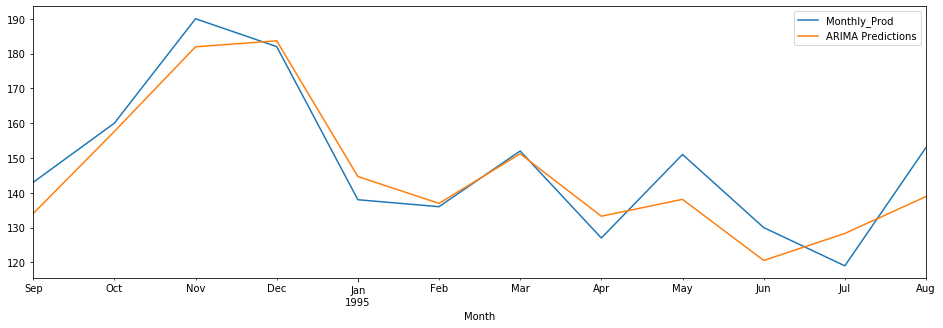

In [10]:
test_data['Monthly_Prod'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [11]:
#Model Evaluation
arima_rmse_error = rmse(test_data['Monthly_Prod'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 64.99116627373826
RMSE Error: 8.061709885237638
Mean: 136.39537815126045


In [12]:
test_data['ARIMA_Predictions'] = arima_pred

In [13]:
#Prophet

In [14]:

df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]



In [15]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.225996,131.033939,154.740948,151.171037,151.277201,-8.002742,-8.002742,-8.002742,-8.002742,-8.002742,-8.002742,0.0,0.0,0.0,143.223254
472,1995-05-01,151.163858,127.447343,152.112849,151.091370,151.226096,-11.377710,-11.377710,-11.377710,-11.377710,-11.377710,-11.377710,0.0,0.0,0.0,139.786149
473,1995-06-01,151.099649,114.829338,139.171390,151.005963,151.192190,-23.836281,-23.836281,-23.836281,-23.836281,-23.836281,-23.836281,0.0,0.0,0.0,127.263368
474,1995-07-01,151.037511,123.458504,147.563787,150.918161,151.144916,-15.756947,-15.756947,-15.756947,-15.756947,-15.756947,-15.756947,0.0,0.0,0.0,135.280564
475,1995-08-01,150.973302,129.586350,154.241797,150.831686,151.125643,-9.175006,-9.175006,-9.175006,-9.175006,-9.175006,-9.175006,0.0,0.0,0.0,141.798296


In [16]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,145.128028
1994-10-01,166.249471
1994-11-01,173.812765
1994-12-01,186.077000
1995-01-01,155.337051
1995-02-01,146.937841
1995-03-01,159.099309
1995-04-01,143.223254
1995-05-01,139.786149


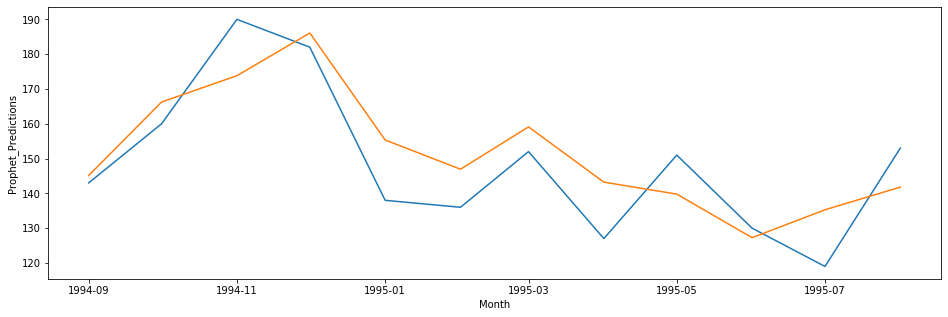

In [17]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly_Prod"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [18]:
prophet_rmse_error = rmse(test_data['Monthly_Prod'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.650946999156
RMSE Error: 11.473924655459264
Mean: 136.39537815126045


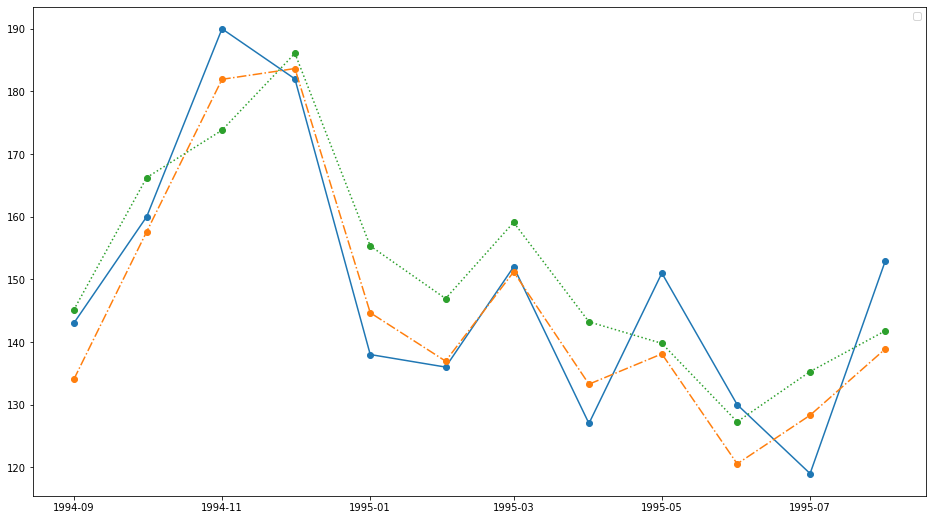

In [19]:
#Comparison

rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly_Prod"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [20]:
print(f"Mean: {test_data['Monthly_Prod'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.061710,64.991166
1,Prophet,11.473925,131.650947


In [21]:
#Final Prediction data
test_data

,Monthly_Prod,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,134.018548,145.128028
1994-10-01,160.0,157.615416,166.249471
1994-11-01,190.0,181.934389,173.812765
1994-12-01,182.0,183.656573,186.077000
1995-01-01,138.0,144.670429,155.337051
1995-02-01,136.0,136.950141,146.937841
1995-03-01,152.0,151.194319,159.099309
1995-04-01,127.0,133.265705,143.223254
1995-05-01,151.0,138.106430,139.786149
